# Basic localization and tracking with pyspaz

We'll run a basic tracking and localization analysis on an example data with histone H2B-HaloTag labeled with the photoactivatable dye PAJFX549.

The workflow is:
1. We'll run localization on a `.ND2` file using `pyspaz.localize.detect_and_localize_file`, outputting a `.locs` file with the individual spot localizations.
2. We'll run tracking using `pyspaz.track.track_locs` on the .LOCS file, outputting a `Tracked.mat` file with the trajectories.
3. We'll visualize the trajectories using ``pyspaz.visualize.show_trajectories``.

The example data for this notebook can be found at 
https://drive.google.com/drive/folders/1NfTXviQrgodXSO4MRBFL3YtcKD6-ZN8r?usp=sharing



In [37]:
# Numerical tools
import numpy as np
import pandas as pd 

# pyspaz
from importlib import reload
import pyspaz
reload(pyspaz)
reload(pyspaz.visualize)

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 300

# Target image file
nd2_file = 'h2b-ht_1-75ms-pulse_region_2.nd2'

# Specify the output LOCS file
loc_file = nd2_file.replace('.nd2', '.locs')

# Specify the output TRACKED.MAT file
out_mat_file = nd2_file.replace('.nd2', '_Tracked.mat')

In [32]:
# Specify the output file
locs_file = nd2_file.replace('.nd2', '.locs')

# Run localization on the file
locs = pyspaz.localize.detect_and_localize_file(
    nd2_file,
    sigma = 1.0,
    out_txt = locs_file,
    window_size = 9,
    detect_threshold = 20.0,
    damp = 0.2,
    camera_bg = 470,
    camera_gain = 110,
    max_iter = 10,
    plot = False,
    initial_guess = 'radial_symmetry',
)


100%|██████████| 32000/32000 [01:14<00:00, 430.46it/s]


In [33]:
# Run tracking on the localization file
trajs, metadata, traj_cols = pyspaz.track.track_locs(
    locs_file,
    out_mat_file = out_mat_file,
    d_max = 20.0,
    d_bound_naive = 0.1,
    search_exp_fac = 3,
    frame_interval_sec = 0.00548,
    max_blinks = 0,
    start_frame = 500,
)

# Show the information in each column of the trajectory
print('Info for trajectory 100:')
for col_idx, traj_col in enumerate(traj_cols):
    print('%s:' % traj_col)
    print(trajs[100,col_idx])
    print('\n')

100%|██████████| 31987/31987 [00:01<00:00, 17855.27it/s]


Info for trajectory 100:
position:
[[ 6.34641023 19.36622666]
 [ 6.44038227 19.27965237]
 [ 6.48094152 19.34246754]]


frame_idx:
[1364 1365 1366]


time:
[7.47472 7.4802  7.48568]


I0:
[117.15237343  98.15504915 112.2034516 ]


bg:
[3.77234093 3.45026941 3.52837045]


llr_detect:
[30.86420775 28.7011018  21.49018194]




400 400


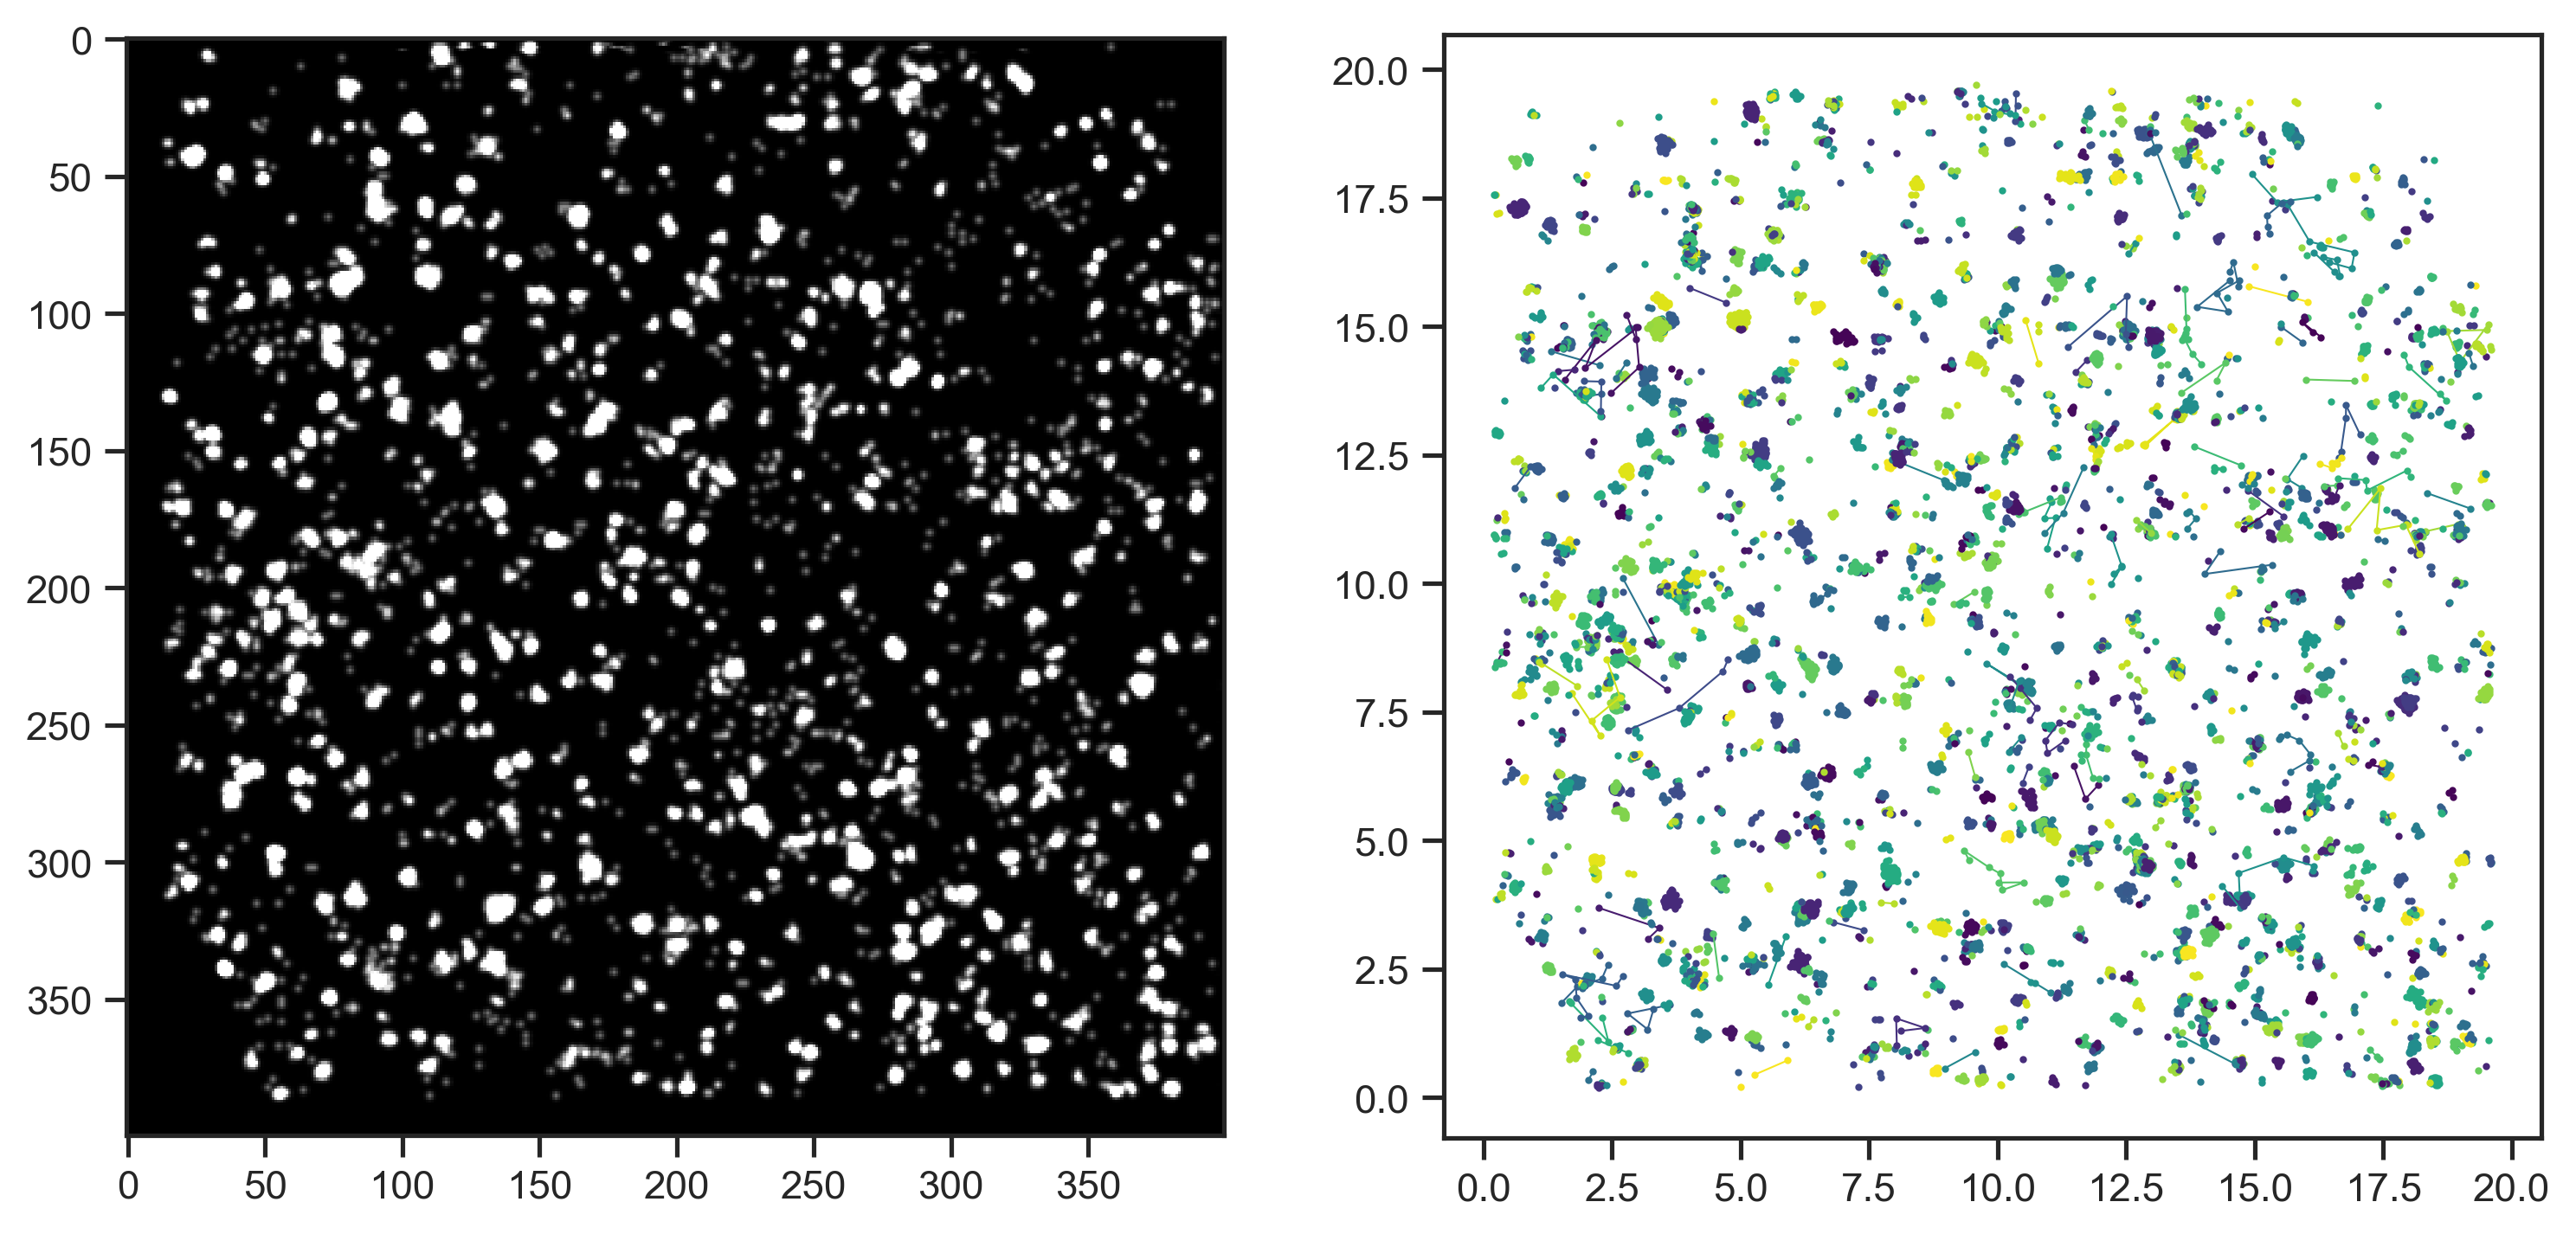

In [40]:
# Show the localization density and trajectories
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

# Plot localization density
density = pyspaz.visualize.loc_density(
    locs,
    metadata = metadata,
    ax = axes[0],
    kernel_width = 0.05,
)

# Plot the first 3000 trajectories
pyspaz.visualize.show_trajectories(
    trajs,
    ax = axes[1],
    cap = 3000,
)

# Show the result
plt.show(); plt.close()